# *Analyzing Amazon Sales data*


# Data Preprocessing

# **Import necessary libraries**

In [ ]:
# Install necessary libraries
!pip install pandas matplotlib seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **Data Collection**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Amazon Sales data.csv to Amazon Sales data.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Amazon Sales data.csv']))
df
# Dataset is now stored in a Pandas Dataframe

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


# **ETL Process-Extract-Transform-Load**

In [ ]:
# Convert columns to appropriate data types
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [ ]:
df['Region'] = df['Region'].astype(str)
df['Country'] = df['Country'].astype(str)
df['Item Type'] = df['Item Type'].astype(str)
df['Sales Channel'] = df['Sales Channel'].astype(str)
df['Order Priority'] = df['Order Priority'].astype(str)
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [ ]:
df[['Units Sold',	'Unit Price',	'Unit Cost',	'Total Revenue',	'Total Cost',	'Total Profit']].describe()

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


## **Adding extra column to dataframe which contain Sales-trend -> month-wise, year-wise, yearly_month-wise**

In [ ]:
# Create new columns for month, year, and yearly-month
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Order MonthYear'] = df['Order Date'].dt.strftime('%Y-%m')
df = df.drop(columns=['Order Date'])

# Group the data by month, year, and yearly-month
grouped_by_month = df.groupby('Order Month')
grouped_by_year = df.groupby('Order Year')
grouped_by_year_month = df.groupby('Order MonthYear')

In [ ]:
# Calculate total revenue for each group
total_revenue_by_month = grouped_by_month['Total Revenue'].sum()
total_revenue_by_year = grouped_by_year['Total Revenue'].sum()
total_revenue_by_year_month = grouped_by_year_month['Total Revenue'].sum()

# Plots for  Profit and Revenue per month

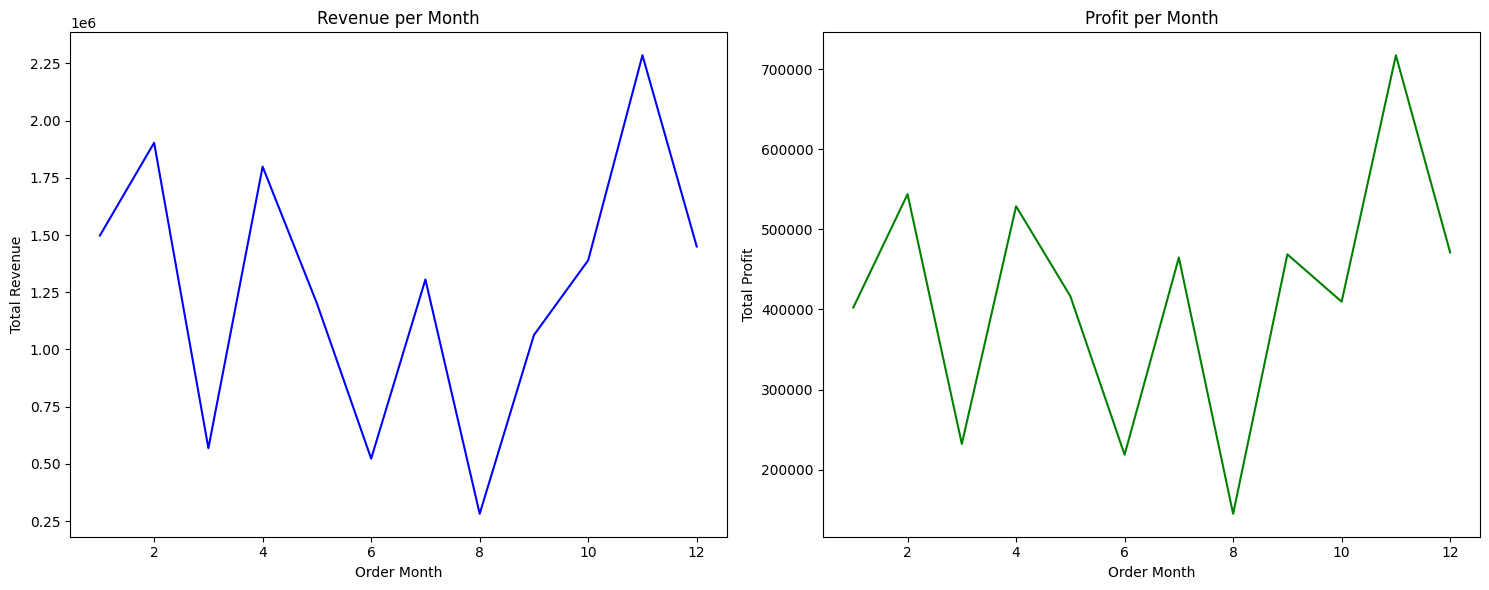

In [ ]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot Total Revenue
df.groupby('Order Month')['Total Revenue'].mean().plot(ax=axes[0], color='blue')
axes[0].set_xlabel('Order Month')
axes[0].set_ylabel('Total Revenue')
axes[0].set_title('Revenue per Month')

# Plot Total Profit
df.groupby('Order Month')['Total Profit'].mean().plot(ax=axes[1], color='green')
axes[1].set_xlabel('Order Month')
axes[1].set_ylabel('Total Profit')
axes[1].set_title('Profit per Month')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

#**Plots for  Profit and Revenue per Year**

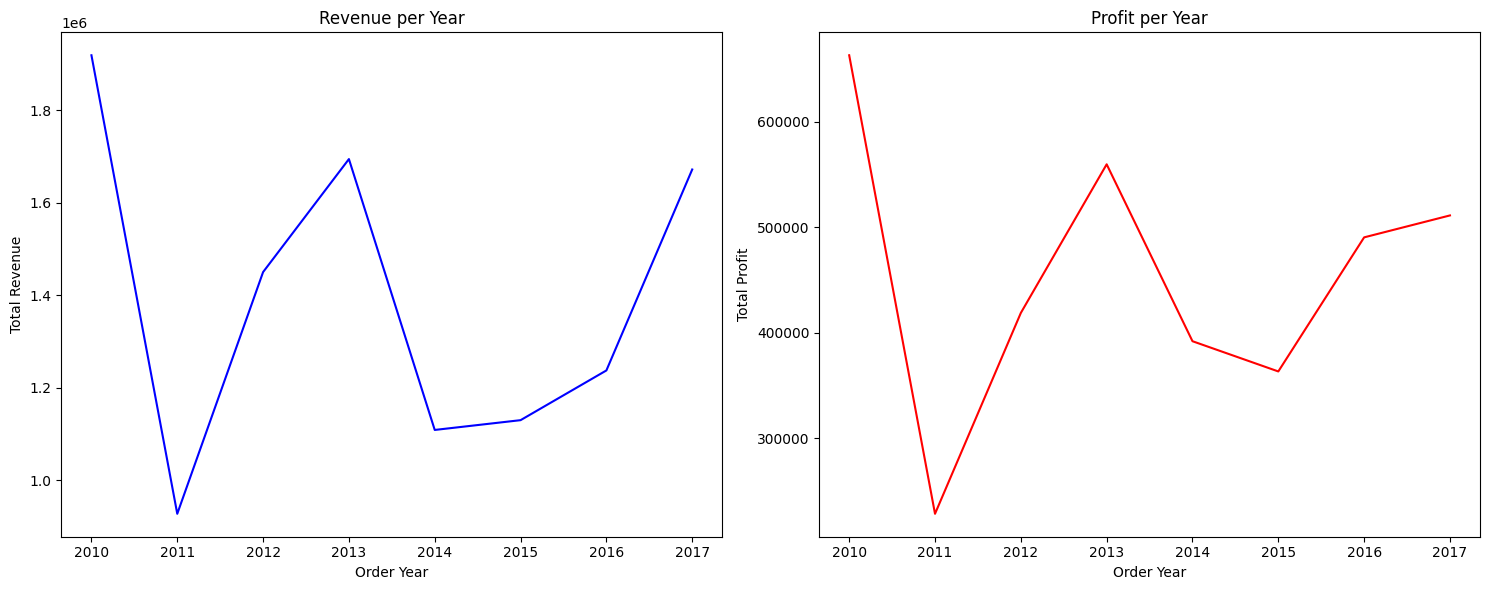

In [ ]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot Total Revenue
df.groupby('Order Year')['Total Revenue'].mean().plot(ax=axes[0], color='blue')
axes[0].set_xlabel('Order Year')
axes[0].set_ylabel('Total Revenue')
axes[0].set_title('Revenue per Year')

# Plot Total Profit
df.groupby('Order Year')['Total Profit'].mean().plot(ax=axes[1], color='red')
axes[1].set_xlabel('Order Year')
axes[1].set_ylabel('Total Profit')
axes[1].set_title('Profit per Year')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

#**Plots for  Profit and Revenue per MonthYear**

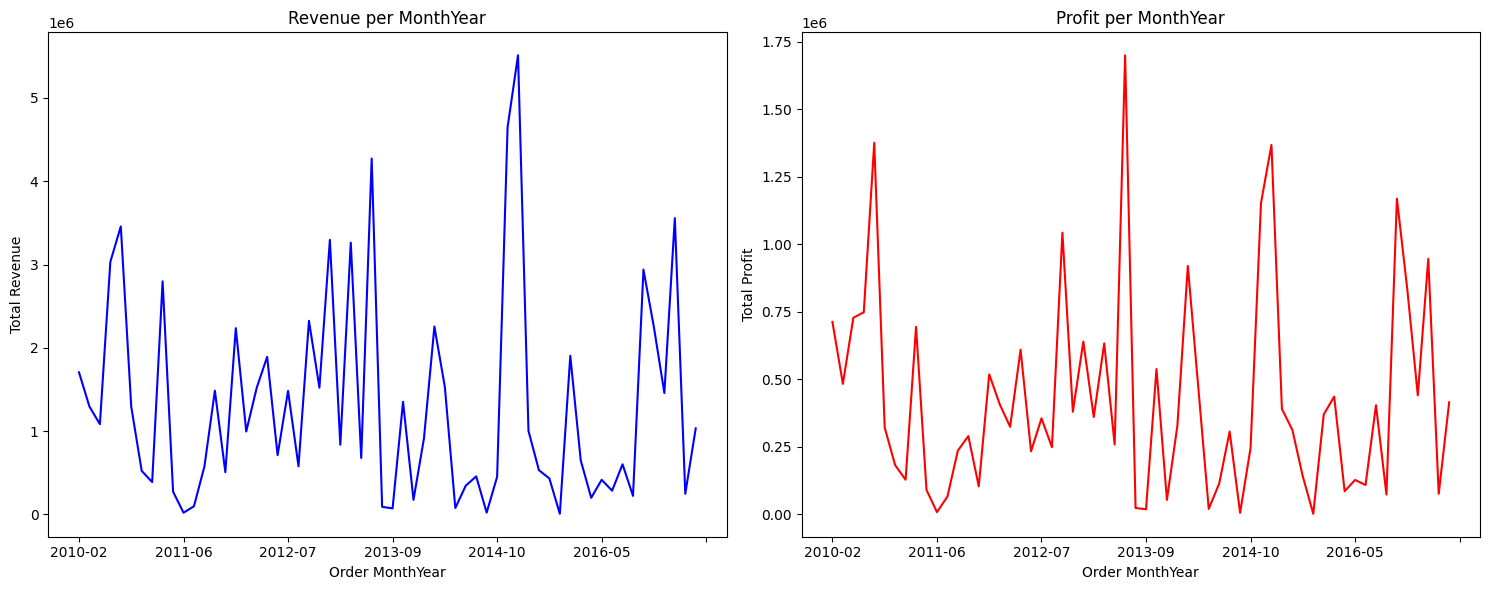

In [ ]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot Total Revenue
df.groupby('Order MonthYear')['Total Revenue'].mean().plot(ax=axes[0], color='blue')
axes[0].set_xlabel('Order MonthYear')
axes[0].set_ylabel('Total Revenue')
axes[0].set_title('Revenue per MonthYear')

# Plot Total Profit
df.groupby('Order MonthYear')['Total Profit'].mean().plot(ax=axes[1], color='red')
axes[1].set_xlabel('Order MonthYear')
axes[1].set_ylabel('Total Profit')
axes[1].set_title('Profit per MonthYear')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

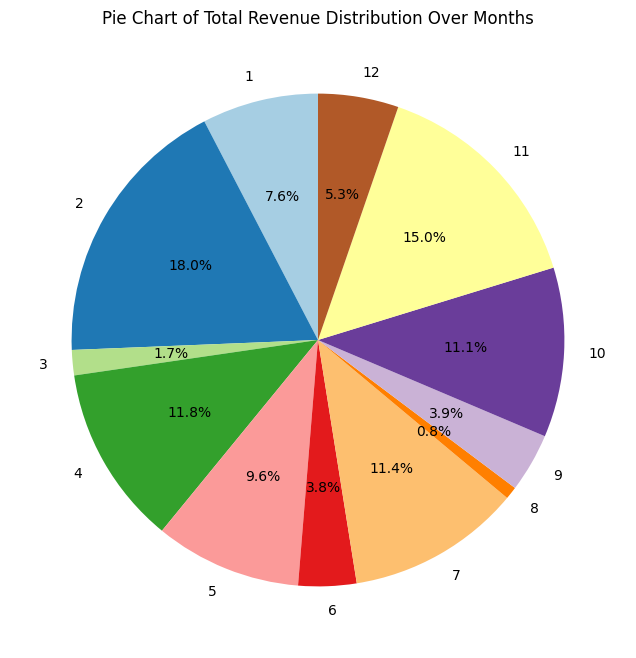

In [ ]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_revenue_by_month, labels=total_revenue_by_month.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Pie Chart of Total Revenue Distribution Over Months')
plt.show()

In [ ]:
# Example: Display the sum of 'Total Revenue over years
print("\nTotal Revenue grouped by year:")
print(grouped_by_year['Total Revenue'].sum())



Total Revenue grouped by year:
Order Year
2010    19186024.92
2011    11129166.07
2012    31898644.52
2013    20330448.66
2014    16630214.43
2015    12427982.86
2016    12372867.22
2017    13373419.63
Name: Total Revenue, dtype: float64


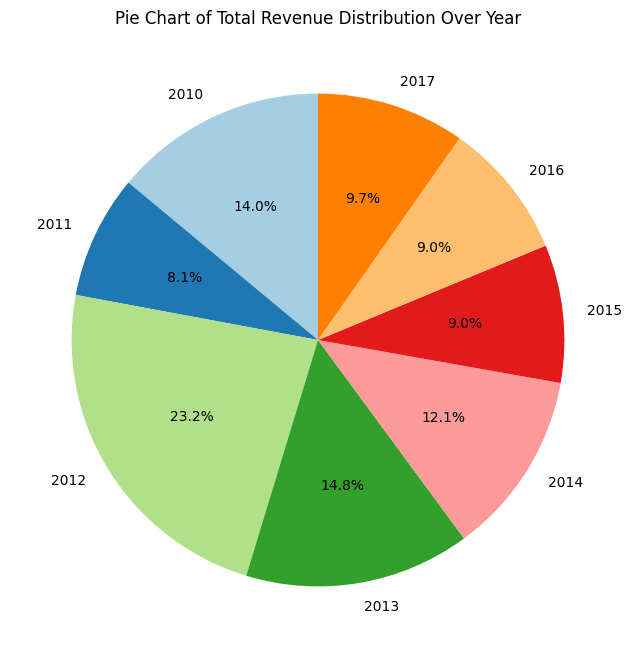

In [ ]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_revenue_by_year, labels=total_revenue_by_year.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Pie Chart of Total Revenue Distribution Over Year')
plt.show()

In [ ]:
# Example: Display the sum of 'Total Revenue over yearmonth
print("\nTotal Revenue grouped by yearly-month:")
print(grouped_by_year_month['Total Revenue'].sum())



Total Revenue grouped by yearly-month:
Order MonthYear
2010-02    3410661.12
2010-05    2587973.26
2010-06    1082418.40
2010-10    6064933.75
2010-11    3458252.00
2010-12    2581786.39
2011-01    1042225.35
2011-02     387002.20
2011-04    2798046.49
2011-05     272410.45
2011-06      19103.44
2011-07      97040.64
2011-09     574951.92
2011-11    5938385.58
2012-01    1012884.00
2012-02    6707849.42
2012-03     994765.42
2012-04    4556012.38
2012-05    3782781.82
2012-06    2132075.27
2012-07    4445093.92
2012-08     576782.80
2012-09    4648152.72
2012-10    3042246.77
2013-02    3296425.02
2013-03     835759.10
2013-04    3262562.10
2013-06    1352867.40
2013-07    8545511.20
2013-08      89623.98
2013-09      71253.21
2013-10    2702770.40
2013-12     173676.25
2014-02    1819660.25
2014-04    4510578.10
2014-05    3060338.59
2014-06      75591.66
2014-07     688641.85
2014-08     455479.04
2014-09      20404.71
2014-10    1352370.65
2014-11    4647149.58
2015-01    5513227.5

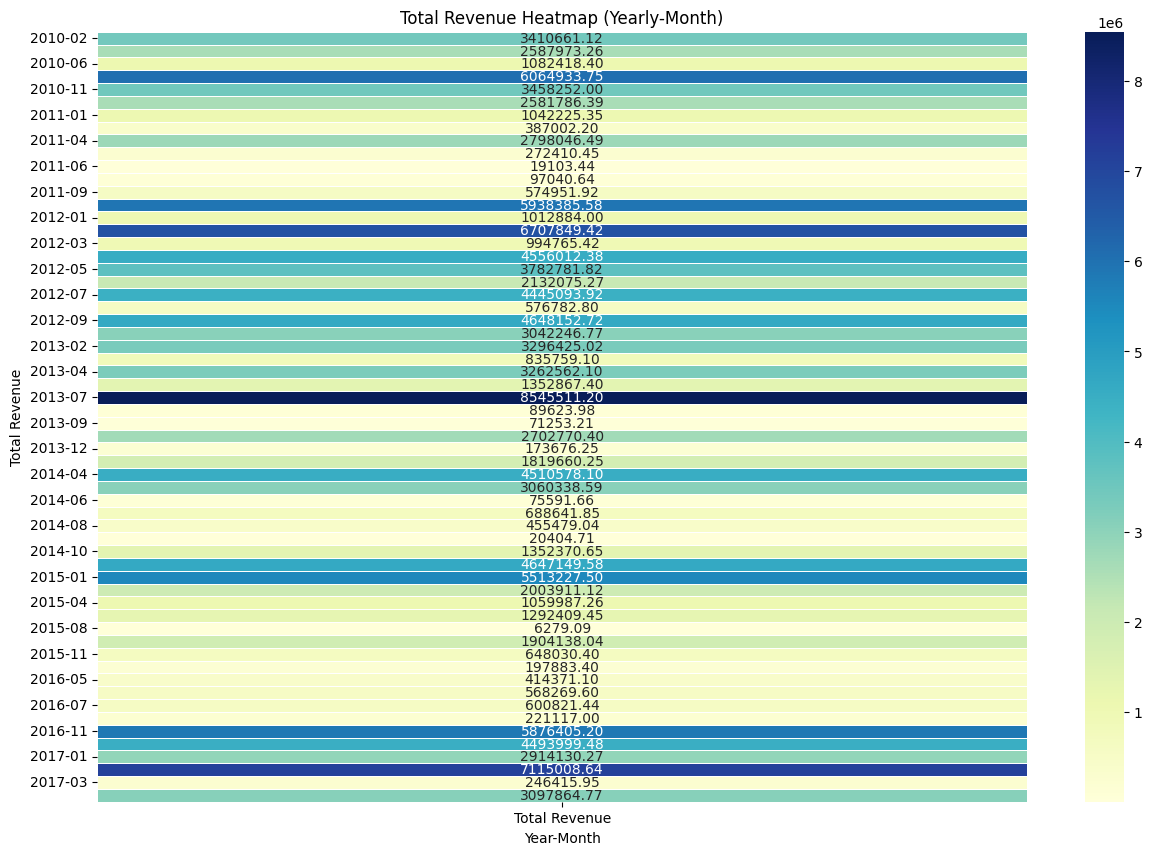

In [ ]:
# Create a heatmap using pivot_table
heatmap_data = total_revenue_by_year_month.reset_index().pivot_table(index='Order MonthYear', values='Total Revenue', fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title('Total Revenue Heatmap (Yearly-Month)')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.show()

# YearMonth with the Highest Total Revenue

In [ ]:
# Find the 'YearMonth' with the highest total revenue
highest_revenue_year_month = df.groupby('Order MonthYear')['Total Revenue'].sum().idxmax()

# Display the result
print(f"The YearMonth with the Highest Total Revenue is: {highest_revenue_year_month}")

The YearMonth with the Highest Total Revenue is: 2013-07


# EDA

In [ ]:
# Specify numerical columns for outlier detection
numerical_columns = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']

# Function to detect outliers using Z-score
def detect_outliers(data, columns, threshold=3):
    outliers = pd.DataFrame()
    for column in columns:
        mean = np.mean(data[column])
        std = np.std(data[column])
        data['z_score'] = np.abs((data[column] - mean) / std)
        outliers = pd.concat([outliers, data[data['z_score'] > threshold]])
    return outliers

# Detect outliers in the specified numerical columns
outliers_df = detect_outliers(df, numerical_columns)

# Display or further analyze the outliers
print("Outliers:")
print(outliers_df)


Outliers:
                               Region    Country        Item Type  \
13  Central America and the Caribbean   Honduras        Household   
13  Central America and the Caribbean   Honduras        Household   
68                             Europe  Lithuania  Office Supplies   

   Sales Channel Order Priority   Order ID  Ship Date  Units Sold  Unit Price  \
13       Offline              H  522840487 2017-02-13        8974      668.27   
13       Offline              H  522840487 2017-02-13        8974      668.27   
68       Offline              H  166460740 2010-11-17        8287      651.21   

    Unit Cost  Total Revenue  Total Cost  Total Profit  Order Month  \
13     502.54     5997054.98  4509793.96    1487261.02            2   
13     502.54     5997054.98  4509793.96    1487261.02            2   
68     524.96     5396577.27  4350343.52    1046233.75           10   

    Order Year Order MonthYear   z_score  
13        2017         2017-02  3.182718  
13        2017   

In [ ]:

# Saving the data dataframe to df
df1= df


# **Total Profit Boxplot**

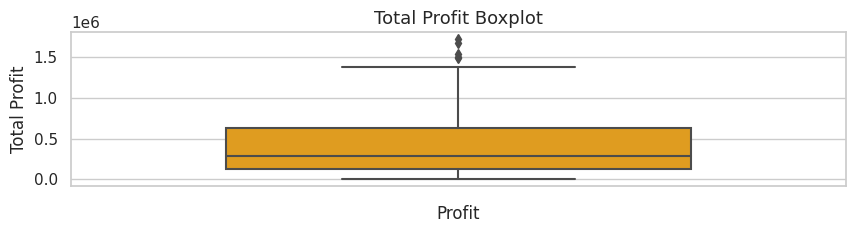

In [ ]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(y=df['Total Profit'], color="orange", width=.6)

plt.title('Total Profit Boxplot', fontsize=13)
plt.xlabel('Profit')
plt.show()

# **Detect Outliers**

In [ ]:
def detect_outliers(dataframe, column):
    threshold = 2    ## 2rd standard deviation
    mean = np.mean(column)
    std = np.std(column)
    outliers = []

    for i, value in enumerate(column):
        z_score = (value - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
            print(dataframe.loc[i])

    return outliers
outliers = detect_outliers(df1, df1["Total Profit"])

Region             Central America and the Caribbean
Country                                     Honduras
Item Type                                  Household
Sales Channel                                Offline
Order Priority                                     H
Order ID                                   522840487
Ship Date                        2017-02-13 00:00:00
Units Sold                                      8974
Unit Price                                    668.27
Unit Cost                                     502.54
Total Revenue                             5997054.98
Total Cost                                4509793.96
Total Profit                              1487261.02
Order Month                                        2
Order Year                                      2017
Order MonthYear                              2017-02
z_score                                      2.39625
Name: 13, dtype: object
Region                          Europe
Country                    Switzerla

In [ ]:
print(outliers)

[13, 30, 33, 46, 74, 79, 93]


In [ ]:
list_length = len(outliers)

# Print the number of values in the list
print("There are ", list_length, "outliers in Total Profit column of dataframe data ")

There are  7 outliers in Total Profit column of dataframe data 


# **Total Cost Boxplot**

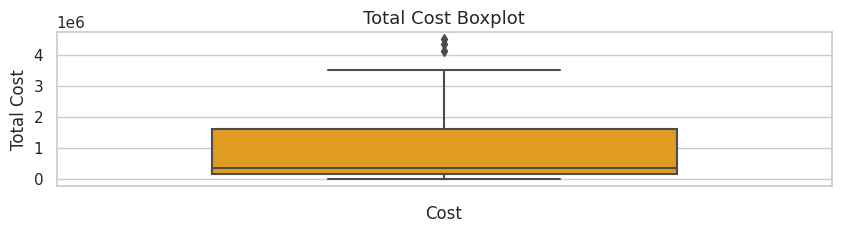

In [ ]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(y=df['Total Cost'], color="orange", width=.6)

plt.title('Total Cost Boxplot', fontsize=13)
plt.xlabel('Cost')
plt.show()

In [ ]:
outliers = detect_outliers(df1, df1["Total Cost"])

Region             Central America and the Caribbean
Country                                     Honduras
Item Type                                  Household
Sales Channel                                Offline
Order Priority                                     H
Order ID                                   522840487
Ship Date                        2017-02-13 00:00:00
Units Sold                                      8974
Unit Price                                    668.27
Unit Cost                                     502.54
Total Revenue                             5997054.98
Total Cost                                4509793.96
Total Profit                              1487261.02
Order Month                                        2
Order Year                                      2017
Order MonthYear                              2017-02
z_score                                      2.39625
Name: 13, dtype: object
Region                            Asia
Country                        Myanm

In [ ]:
print(outliers)

[13, 33, 38, 68, 75]


In [ ]:
list_length = len(outliers)

# Print the number of values in the list
print("There are ", list_length, "outliers in Total Cost column of dataframe data ")

There are  5 outliers in Total Cost column of dataframe data 


# **Total Revenue Boxplot**

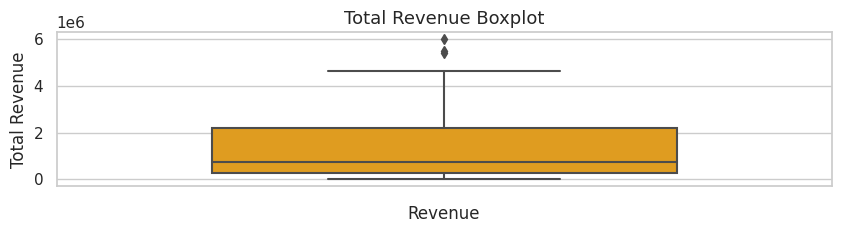

In [ ]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(y=df['Total Revenue'], color="orange", width=.6)

plt.title('Total Revenue Boxplot', fontsize=13)
plt.xlabel('Revenue')
plt.show()

In [ ]:
outliers = detect_outliers(df1, df1["Total Revenue"])
print(outliers)

list_length = len(outliers)

# Print the number of values in the list
print("There are ", list_length, "outliers in Total Revenue column of dataframe data ")

Region             Central America and the Caribbean
Country                                     Honduras
Item Type                                  Household
Sales Channel                                Offline
Order Priority                                     H
Order ID                                   522840487
Ship Date                        2017-02-13 00:00:00
Units Sold                                      8974
Unit Price                                    668.27
Unit Cost                                     502.54
Total Revenue                             5997054.98
Total Cost                                4509793.96
Total Profit                              1487261.02
Order Month                                        2
Order Year                                      2017
Order MonthYear                              2017-02
z_score                                      2.39625
Name: 13, dtype: object
Region                            Asia
Country                        Myanm

# **Key Metrics**

# Average Revenue Per Order

In [ ]:
#key metrics
total_revenue = df1['Total Revenue'].sum()
average_revenue_per_order = df1['Total Revenue'].sum() / df['Order ID'].nunique()
print("average_revenue_per_order", average_revenue_per_order)

average_revenue_per_order 1373487.6831


# Average Profit Per Order

In [ ]:
#key metrics
total_profit = df['Total Profit'].sum()
average_profit_per_order = df['Total Profit'].sum() / df['Order ID'].nunique()
print("average_profit_per_order", average_profit_per_order)

average_profit_per_order 441681.98399999994


# Calculate Total Revenue for each group with respect to Item Type

In [ ]:
# Group the data by item type and calculate total revenue for each item type
grouped_by_item_type = df.groupby('Item Type')['Total Revenue'].sum()

# Sort the item types by total revenue in descending order
sorted_item_types = grouped_by_item_type.sort_values(ascending=False)

# Display the result
print("Revenue By Item Types:")
print(sorted_item_types)

Revenue By Item Types:
Item Type
Cosmetics          36601509.60
Office Supplies    30585380.07
Household          29889712.29
Baby Food          10350327.60
Clothes             7787292.80
Cereal              5322898.90
Meat                4503675.75
Personal Care       3980904.84
Vegetables          3089057.06
Beverages           2690794.60
Snacks              2080733.46
Fruits               466481.34
Name: Total Revenue, dtype: float64


# Calculate Total  Profit for each group with respect to Item Type

In [ ]:
# Group the data by item type and calculate total profit for each item type
profit_by_item_type = df.groupby('Item Type')['Total Profit'].sum()

# Sort the item types by total revenue in descending order
profit_item_types = profit_by_item_type.sort_values(ascending=False)

# Display the result
print("Profit By Item Types:")
print(profit_item_types)

Profit By Item Types:
Item Type
Cosmetics          14556048.66
Household           7412605.71
Office Supplies     5929583.75
Clothes             5233334.40
Baby Food           3886643.70
Cereal              2292443.43
Vegetables          1265819.63
Personal Care       1220622.48
Beverages            888047.28
Snacks               751944.18
Meat                 610610.00
Fruits               120495.18
Name: Total Profit, dtype: float64


# Correlations between Attributes

In [ ]:
order_count = df1['Order ID'].nunique()
# Replace 'Number of Orders' column with 'Order Count'
df1['Number of Orders'] = order_count

# Example correlation analysis with the updated column name
correlation_units_sold_revenue = df1['Units Sold'].corr(df1['Total Revenue'])


# Display the correlation results
print("Correlation between Units Sold and Total Revenue:", correlation_units_sold_revenue)


Correlation between Units Sold and Total Revenue: 0.4477844902616836


# **Correlation between 'Total Revenue', 'Total Cost' and 'Total Profit'**

In [ ]:
# Calculating correlation between 'Total Revenue', 'Total Cost' and 'Total Profit' columns
print(df1[['Total Revenue', 'Total Cost', 'Total Profit']].corr())

               Total Revenue  Total Cost  Total Profit
Total Revenue       1.000000    0.983928      0.897327
Total Cost          0.983928    1.000000      0.804091
Total Profit        0.897327    0.804091      1.000000


# **Correlation Matrix Heatmap**

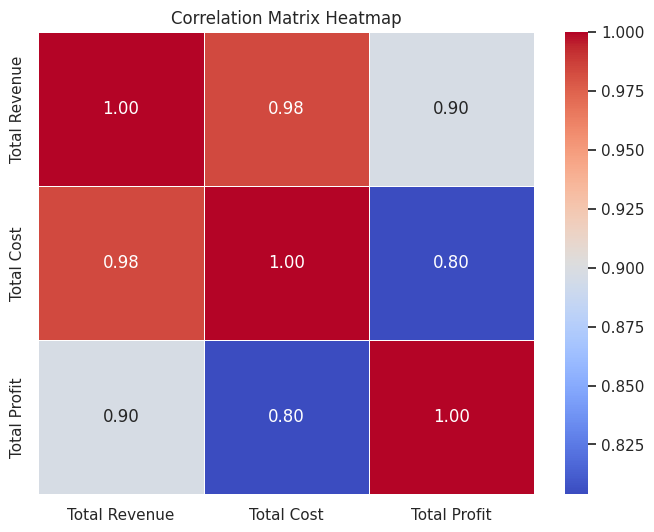

In [ ]:
# Select relevant columns
selected_columns = ['Total Revenue', 'Total Cost', 'Total Profit']
selected_data = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
df1

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order MonthYear,z_score,Number of Orders
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,2010,2010-05,1.168192,100
1,Central America and the Caribbean,Grenada,Cereal,Online,C,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,8,2012,2012-08,0.442948,100
2,Europe,Russia,Office Supplies,Offline,L,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2014,2014-05,0.497510,100
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,6,2014,2014-06,0.967494,100
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,2013,2013-02,0.452390,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,512878119,2011-09-03,888,109.28,35.84,97040.64,31825.92,65214.72,7,2011,2011-07,0.862785,100
96,Asia,Malaysia,Fruits,Offline,L,810711038,2011-12-28,6267,9.33,6.92,58471.11,43367.64,15103.47,11,2011,2011-11,0.977629,100
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,728815257,2016-06-29,1485,154.06,90.93,228779.10,135031.05,93748.05,6,2016,2016-06,0.797392,100
98,North America,Mexico,Personal Care,Offline,M,559427106,2015-08-08,5767,81.73,56.67,471336.91,326815.89,144521.02,7,2015,2015-07,0.681031,100


# FUTURE SALES ANALYSIS(Prediction)

## **Random Forest Regression** - Machine Learning Technique for Predicting Future Sales

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Select relevant features and target variables
features = ['Units Sold', 'Unit Price', 'Unit Cost']
target_revenue = 'Total Revenue'
target_profit = 'Total Profit'

X = df1[features]
y_revenue = df1[target_revenue]
y_profit = df1[target_profit]

# Split the data into training and testing sets
X_train, X_test, y_revenue_train, y_revenue_test, y_profit_train, y_profit_test = train_test_split(
    X, y_revenue, y_profit, test_size=0.2, random_state=42
)

# Train a Random Forest Regressor model for Total Revenue
model_revenue = RandomForestRegressor(n_estimators=100, random_state=42)
model_revenue.fit(X_train, y_revenue_train)

# Predict on the test set for Total Revenue
y_revenue_pred = model_revenue.predict(X_test)

# Evaluate the Total Revenue model
mse_revenue = mean_squared_error(y_revenue_test, y_revenue_pred)
print(f'Mean Squared Error (Total Revenue): {mse_revenue}')

# Train a Random Forest Regressor model for Total Profit
model_profit = RandomForestRegressor(n_estimators=100, random_state=42)
model_profit.fit(X_train, y_profit_train)

# Predict on the test set for Total Profit
y_profit_pred = model_profit.predict(X_test)

# Evaluate the Total Profit model
mse_profit = mean_squared_error(y_profit_test, y_profit_pred)
print(f'Mean Squared Error (Total Profit): {mse_profit}')

Mean Squared Error (Total Revenue): 77545375736.53954
Mean Squared Error (Total Profit): 3782007088.419856


# Calculating R-Sqaured Score

In [ ]:
from sklearn.metrics import r2_score

# Calculate R-squared for Total Revenue
r2_revenue = r2_score(y_revenue_test, y_revenue_pred)
print(f'R-squared (Total Revenue): {r2_revenue}')

# Calculate R-squared for Total Profit
r2_profit = r2_score(y_profit_test, y_profit_pred)
print(f'R-squared (Total Profit): {r2_profit}')


R-squared (Total Revenue): 0.9649714492673243
R-squared (Total Profit): 0.9773772427201228


# Percentage Accuracy For Total Profit And Total Revenue

In [ ]:
# Calculate R-squared for Total Revenue
r2_revenue = r2_score(y_revenue_test, y_revenue_pred)
percentage_accuracy_revenue = r2_revenue * 100
print(f'Percentage Accuracy (Total Revenue): {percentage_accuracy_revenue:.2f}%')

# Calculate R-squared for Total Profit
r2_profit = r2_score(y_profit_test, y_profit_pred)
percentage_accuracy_profit = r2_profit * 100
print(f'Percentage Accuracy (Total Profit): {percentage_accuracy_profit:.2f}%')


Percentage Accuracy (Total Revenue): 96.50%
Percentage Accuracy (Total Profit): 97.74%


# Predicted vs Actual Plots

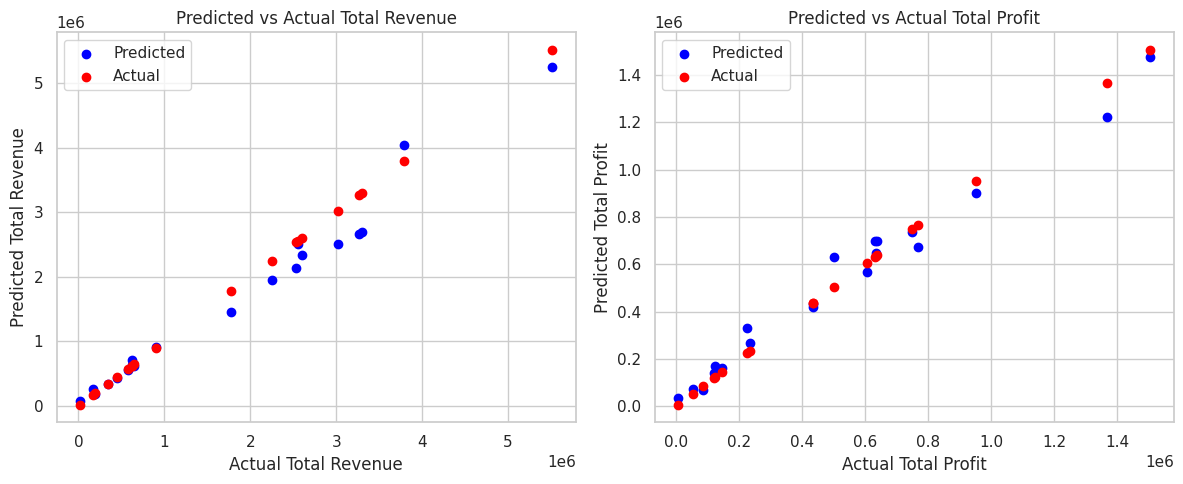

In [ ]:
# Set up a 1x2 subplot grid
plt.figure(figsize=(12, 5))

# Subplot 1: Total Revenue
plt.subplot(1, 2, 1)
plt.scatter(y_revenue_test, y_revenue_pred, color='blue', label='Predicted')
plt.scatter(y_revenue_test, y_revenue_test, color='red', label='Actual')
plt.xlabel('Actual Total Revenue')
plt.ylabel('Predicted Total Revenue')
plt.title('Predicted vs Actual Total Revenue')
plt.legend()

# Subplot 2: Total Profit
plt.subplot(1, 2, 2)
plt.scatter(y_profit_test, y_profit_pred, color='blue', label='Predicted')
plt.scatter(y_profit_test, y_profit_test, color='red', label='Actual')
plt.xlabel('Actual Total Profit')
plt.ylabel('Predicted Total Profit')
plt.title('Predicted vs Actual Total Profit')
plt.legend()

# Adjust layout for better appearance
plt.tight_layout()

# Show the plots
plt.show()


# Residual Plot and Feature Importance Plot

# **For Total Revenue**

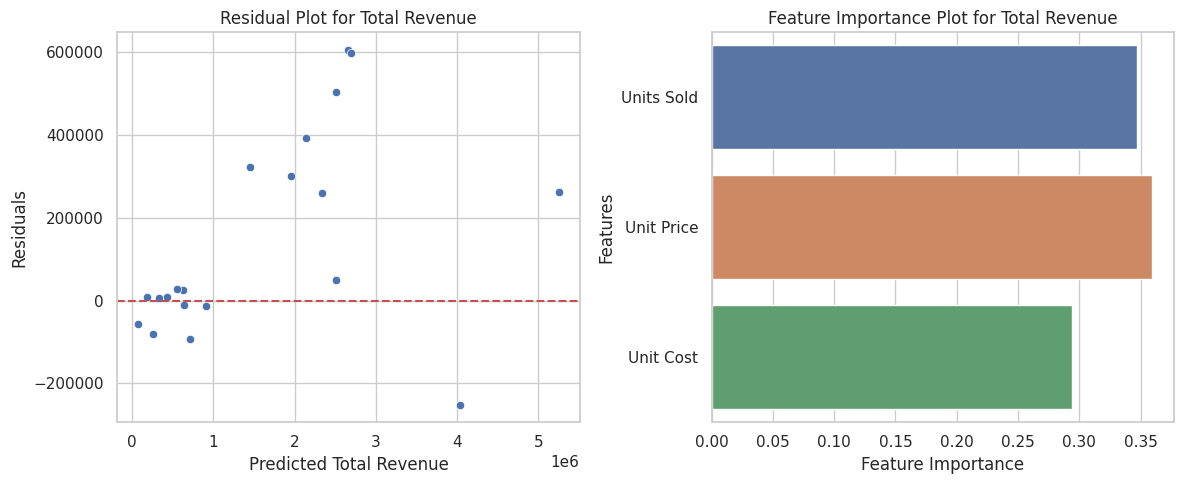

In [ ]:
# Set up a 1x2 subplot grid
plt.figure(figsize=(12, 5))

# Subplot 1: Residual Plot for Total Revenue
plt.subplot(1, 2, 1)
residuals_revenue = y_revenue_test - y_revenue_pred
sns.scatterplot(x=y_revenue_pred, y=residuals_revenue)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Total Revenue')
plt.ylabel('Residuals')
plt.title('Residual Plot for Total Revenue')

# Subplot 2: Feature Importance Plot for Total Revenue
plt.subplot(1, 2, 2)
feature_importance_revenue = model_revenue.feature_importances_
sns.barplot(x=feature_importance_revenue, y=features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot for Total Revenue')

# Adjust layout for better appearance
plt.tight_layout()

# Show the plots
plt.show()


# Residual Plot and Feature Importance Plot

# **For Total Profit**

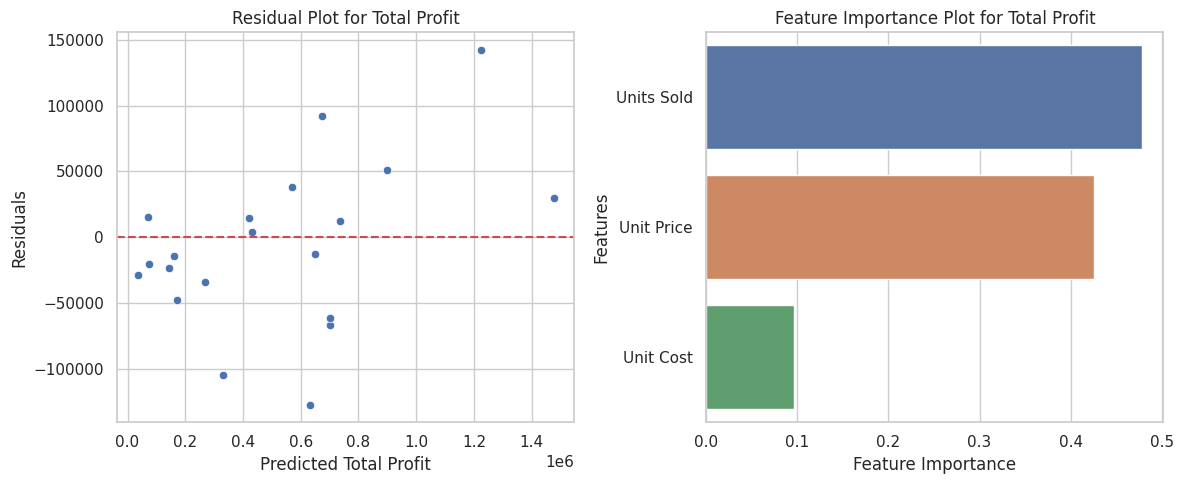

In [ ]:
# Set up a 1x2 subplot grid
plt.figure(figsize=(12, 5))

# Subplot 1: Residual Plot for Total Profit
plt.subplot(1, 2, 1)
residuals_profit = y_profit_test - y_profit_pred
sns.scatterplot(x=y_profit_pred, y=residuals_profit)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Total Profit')
plt.ylabel('Residuals')
plt.title('Residual Plot for Total Profit')

# Subplot 2: Feature Importance Plot for Total Profit
plt.subplot(1, 2, 2)
feature_importance_profit = model_profit.feature_importances_
sns.barplot(x=feature_importance_profit, y=features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot for Total Profit')

# Adjust layout for better appearance
plt.tight_layout()

# Show the plots
plt.show()
